### Gaussian Mixture Models and HDBSCAN for Clustering

####  Pros: 
GMM allows data to vary anisotropically and provides probability estimates of cluster membership rather than "hard labeling" data points like K-means.

#### Cons: 
GMM still assumes normal distributions across dimensions and requires the number of components/clusters are specified a priori.

#### Links:

http://scikit-learn.org/stable/modules/mixture.html

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

https://www.datascience.com/blog/k-means-alternatives?utm_source=hs_email&utm_medium=email&utm_content=61156794

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
%reset -f

import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

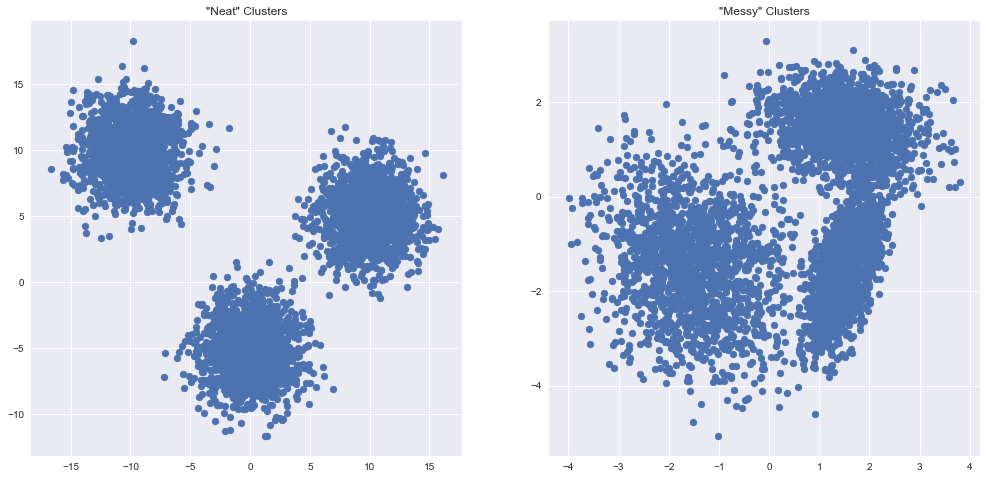

In [2]:
#Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000, centers=centers_neat, cluster_std=2, random_state=2)

x_messy, _ = datasets.make_classification(n_samples=5000, n_features=10, n_classes=3, n_clusters_per_class=1,
                                          class_sep=1.5, shuffle=False, random_state=301)

#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])
plt.show()

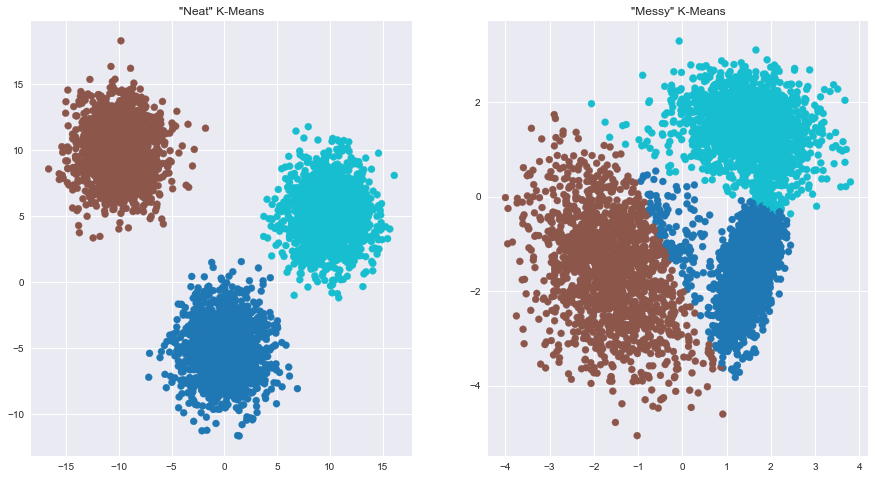

In [3]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.show()

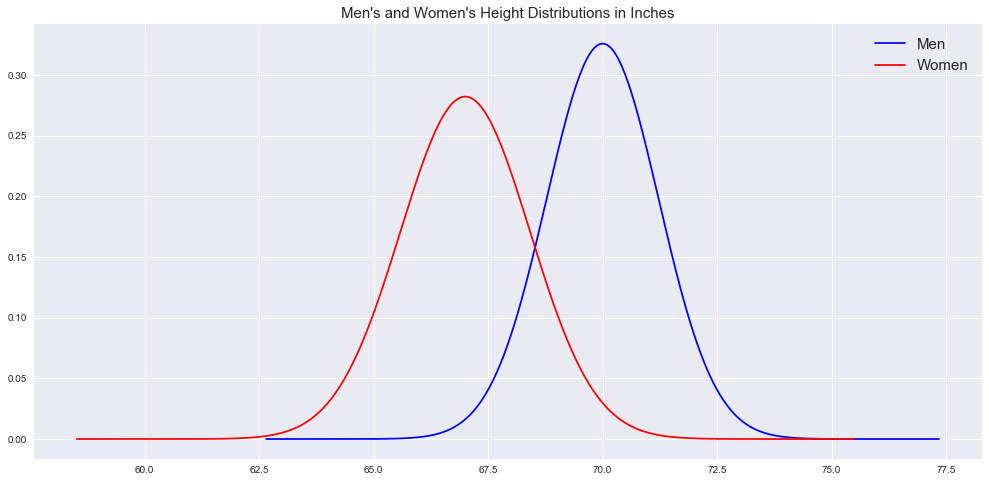

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import math

men_mean = 70
men_var = 1.5
men_std = math.sqrt(men_var)
men_dist = np.linspace(men_mean - 6 * men_std, men_mean + 6 * men_std, 400)

women_mean = 67
women_var = 2
women_std = math.sqrt(women_var)
women_dist = np.linspace(women_mean - 6 * women_std, women_mean + 6 * women_std, 400)

plt.figure(figsize=(17,8))
plt.title('Men\'s and Women\'s Height Distributions in Inches', fontdict={'fontsize':15})
plt.plot(men_dist, mlab.normpdf(men_dist, men_mean, men_std), 'b-', label='Men')
plt.plot(women_dist, mlab.normpdf(women_dist, women_mean, women_std), 'r-', label='Women')
plt.legend(fontsize=15)
plt.show()

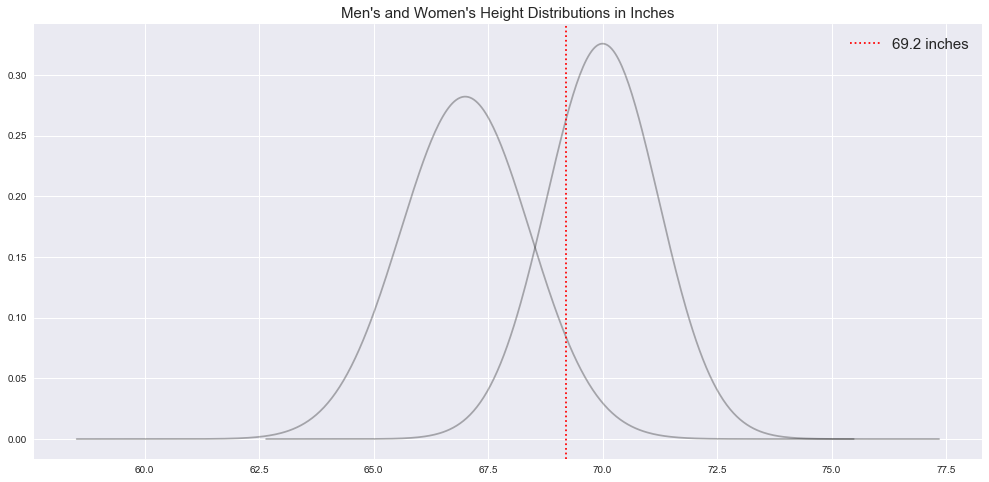

In [5]:
plt.figure(figsize=(17,8))
plt.title('Men\'s and Women\'s Height Distributions in Inches', fontdict={'fontsize':15})
plt.plot(men_dist, mlab.normpdf(men_dist, men_mean, men_std), 'k', alpha=.3)
plt.plot(women_dist, mlab.normpdf(women_dist, women_mean, women_std), 'k', alpha=.3)
plt.axvline(x=69.2, c='r', linestyle=":", label='69.2 inches')
plt.legend(fontsize=15)
plt.show()

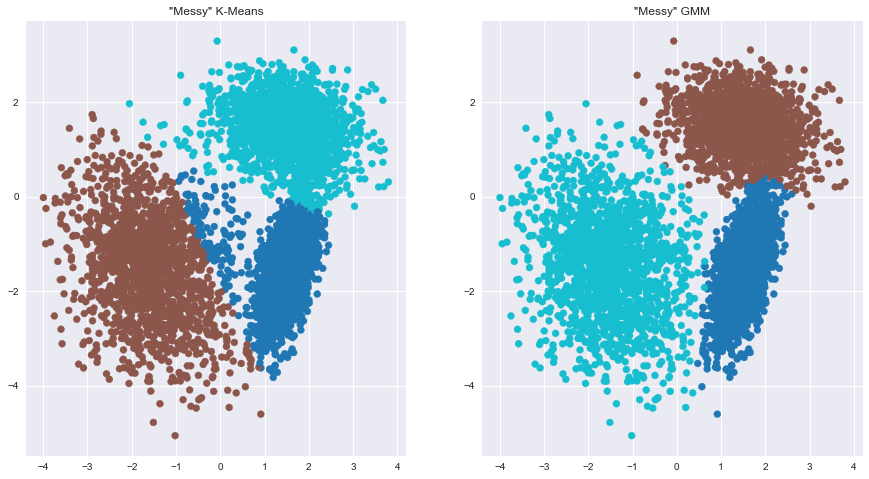

In [6]:
from sklearn.mixture import GaussianMixture

# Predict GMM cluster membership
gmModel = GaussianMixture(n_components=3)
gmModel.fit(x_messy)
gm_messy = gmModel.predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.subplot(122, title='"Messy" GMM')
plt.scatter(x_messy[:,0], x_messy[:,1], c=gm_messy, cmap=cmap)
plt.show()

#### What happens with imbalanced datasets ?
The previous example had decently balanced datasets. What if the datasets were severely imbalanced?

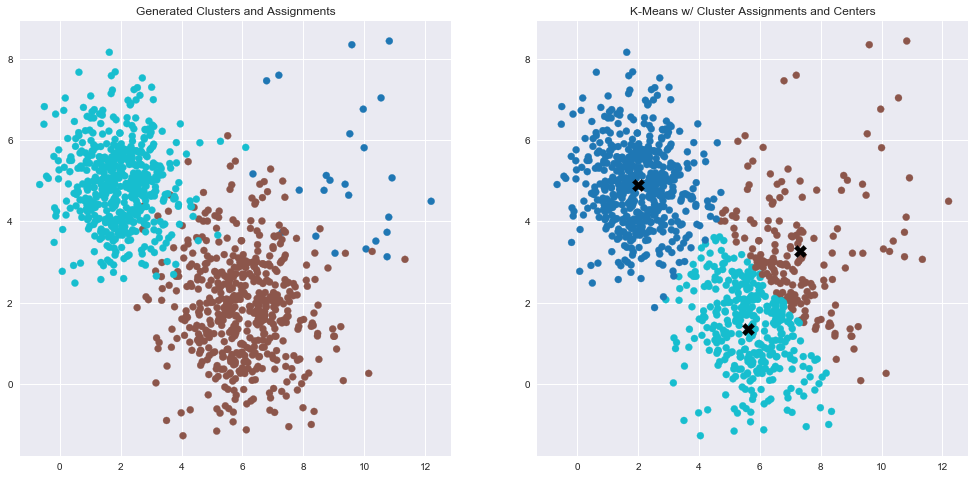

In [7]:
#Toy data set
blob1, y1 = datasets.make_blobs(n_samples=25,
                               centers=[(10,5)],
                               cluster_std=1.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=500,
                               centers=[(6,2)],
                               cluster_std=1.3,
                               random_state=2)

blob3, y3 = datasets.make_blobs(n_samples=500,
                               centers=[(2,5)],
                               cluster_std=1,
                               random_state=2)

unbal = np.vstack([blob1, blob2, blob3])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
y3[y3 == 0] = 2
labs = np.concatenate([y1, y2, y3])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=3, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=3, random_state=2).fit_predict(unbal)

plt.figure(figsize=(17,8))
plt.subplot(121, title='Generated Clusters and Assignments')
plt.scatter(unbal[:,0], unbal[:,1], c=labs, cmap=cmap)
plt.subplot(122, title='K-Means w/ Cluster Assignments and Centers')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')
plt.show()

### HDBSCAN

#### Pros:
Does not require the number of clusters to be set a priori and allows for noisy data.

#### Cons:
Relies on the density of data points so sparse data sets may not work well and may lose efficiency on higher dimensional data sets.

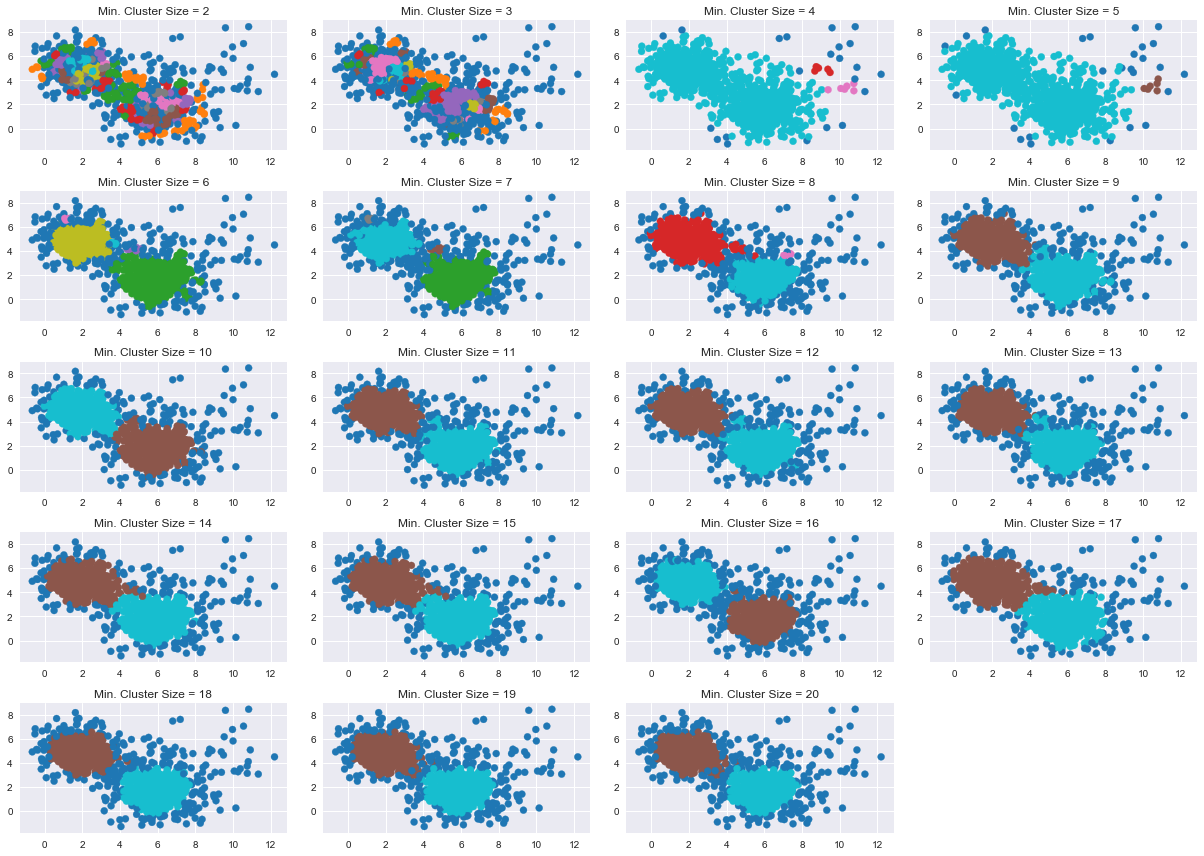

In [11]:
import hdbscan

clust_count = np.linspace(1, 20, num=20, dtype='int')

clust_number = 2
plot_number = 1
plt.figure (figsize=(17,12))
while clust_number < 21:
    hdb = hdbscan.HDBSCAN(min_cluster_size=clust_number)
    hdb_pred = hdb.fit(unbal)
    plt.subplot(5, 4, plot_number, title = 'Min. Cluster Size = {}'.format(clust_number))
    plt.scatter(unbal[:,0], unbal[:,1], c=hdb_pred.labels_, cmap=cmap)
    plot_number += 1
    clust_number += 1

plt.tight_layout()